In [8]:
import random as rnd
rnd.randint(1,2)

2

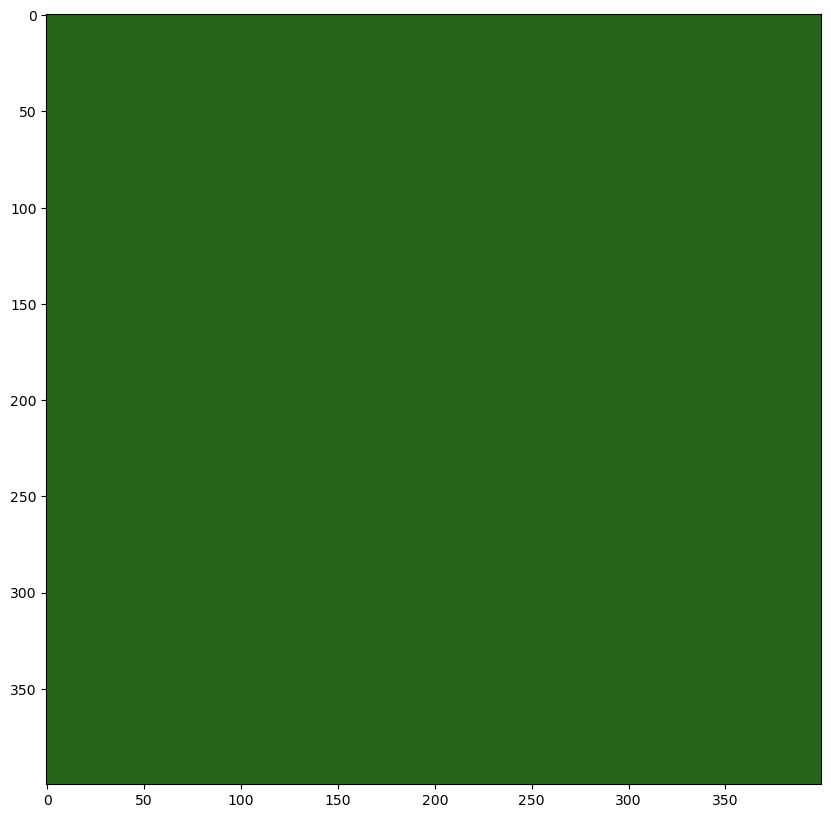

/Users/janavsama/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [9]:
"""
File: alife.py
Description: A simple artificial life simulation.

"""
import random as rnd
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



SIZE = 400    # x/y dimensions of the field
WRAP = True  # When moving beyond the border, do we wrap around to the other size
OFFSPRING = 5  # The number of offspring when a rabbit reproduces
GRASS_RATE = 0.1  # Probability of grass growing at any given location, e.g., 2%
INIT_RABBITS = 1 # Number of starting rabbits
SPEED = 1  # Number of generations per frame



class Rabbit:

    def __init__(self):
        self.x = rnd.randrange(0, SIZE)
        self.y = rnd.randrange(0, SIZE)
        self.eaten = 0

    def reproduce(self):
        self.eaten = 0
        return copy.deepcopy(self)


    def eat(self, amount):
        self.eaten += amount


    def move(self):
        if WRAP:
            self.x = (self.x + rnd.choice([-1, 0, 1])) % SIZE
            self.y = (self.y + rnd.choice([-1, 0, 1])) % SIZE
        else:
            self.x = min(SIZE-1, max(0, (self.x + rnd.choice([-1, 0, 1]))))
            self.y = min(SIZE-1, max(0, (self.y + rnd.choice([-1, 0, 1]))))


class Field:
    """ A field is a patch of grass with 0 or more rabbits hopping around
    in search of grass """

    def __init__(self):
        self.rabbits = []
        self.field = np.ones(shape=(SIZE, SIZE), dtype=int)

    def add_rabbit(self, rabbit):
        self.rabbits.append(rabbit)

    def move(self):
        for r in self.rabbits:
            r.move()

    def eat(self):
        """ All rabbits try to eat grass at their current location """
        for r in self.rabbits:
            r.eat(self.field[r.x, r.y])
            self.field[r.x, r.y] = 0


    def survive(self):
        """ Rabbits that have not eaten die. Otherwise, they live """
        self.rabbits = [r for r in self.rabbits if r.eaten > 0]


    def reproduce(self):
        born = []
        for r in self.rabbits:
            for _ in range(rnd.randint(1,OFFSPRING)):
                born.append(r.reproduce())
        self.rabbits += born




    def grow(self):
        growloc = (np.random.rand(SIZE,SIZE) < GRASS_RATE) * 1
        self.field = np.maximum(self.field, growloc)

    def generation(self):
        """ Run one generation of rabbit actions """
        self.move()
        self.eat()
        self.survive()
        self.reproduce()
        self.grow()

def animate(i, field, im):
    for _ in range(SPEED):
        field.generation()
    im.set_array(field.field)
    plt.title("Generation: " + str(i * SPEED) + " Rabbits: " + str(len(field.rabbits)))
    return im,


def main():

    # Create the ecosystem
    field = Field()

    # Initialize with some rabbits
    for _ in range(INIT_RABBITS):
        field.add_rabbit(Rabbit())

    # Set up the image object
    array = np.ones(shape=(SIZE, SIZE), dtype=int)
    fig = plt.figure(figsize=(10,10))
    im = plt.imshow(array, cmap='PiYG', interpolation='hamming', aspect='auto', vmin=0, vmax=1)
    anim = animation.FuncAnimation(fig, animate, fargs=(field, im), frames=10**100, interval=1, repeat=True)
    plt.show()




if __name__ == '__main__':
    main()





In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Simulation of foxes and rabbits in a field')
parser.add_argument('-g', '--grass_growth_rate', type=float, required=True,
                        help='Rate at which grass grows in the field')

args = parser.parse_args()

print(args.file)